<a href="https://colab.research.google.com/github/Uliana-san/Japan/blob/master/Classwork%20synth%20analysis%20Karenina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# ячейка может выполняться долго, это нормально
! pip3 install ufal.udpipe
from ufal.udpipe import Model, Pipeline #импортируем нужные части из модуля

In [26]:
UDPIPE_MODEL_FN = "model_ru.udpipe"
UDPIPE_MODEL_FN2 = "model_syntagrus_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
!wget -O {UDPIPE_MODEL_FN2} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-syntagrus-ud-2.0-170801.udpipe?raw=true

--2019-12-07 09:31:03--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2019-12-07 09:31:03--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2019-12-07 09:31:03--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

In [0]:
model = Model.load(UDPIPE_MODEL_FN) # загружаем модель, сохраняем в переменную model
model2 = Model.load(UDPIPE_MODEL_FN2)

In [28]:
sent = "Степан Аркадьич сел, прочел письма. Одно было очень неприятное — от купца, покупавшего лес в имении жены. Лес этот необходимо было продать; но теперь, до примирения с женой, не могло быть о том речи. Всего же неприятнее тут было то, что этим подмешивался денежный интерес в предстоящее дело его примирения с женою. И мысль, что он может руководиться этим интересом, что он для продажи этого леса будет искать примирения с женой, — эта мысль оскорбляла его."
print(sent)

Степан Аркадьич сел, прочел письма. Одно было очень неприятное — от купца, покупавшего лес в имении жены. Лес этот необходимо было продать; но теперь, до примирения с женой, не могло быть о том речи. Всего же неприятнее тут было то, что этим подмешивался денежный интерес в предстоящее дело его примирения с женою. И мысль, что он может руководиться этим интересом, что он для продажи этого леса будет искать примирения с женой, — эта мысль оскорбляла его.


In [29]:
pipeline = Pipeline(model2, 'generic_tokenizer', '','','') #функции нужно 5 аргументов,но нам важны только 2
#сохраняем в переменную результат токенизации
ud_res = []
parsed = pipeline.process(sent) # функция process сделает синтаксический анализ, сохраняем еще раз

print(parsed) # печатаем результат
#type(parsed)

# newdoc
# newpar
# sent_id = 1
# text = Степан Аркадьич сел, прочел письма.
1	Степан	степан	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	3	nsubj	_	_
2	Аркадьич	Аркадьич	PROPN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	1	appos	_	_
3	сел	садиться	VERB	_	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Mid	0	root	_	SpaceAfter=No
4	,	,	PUNCT	_	_	3	punct	_	_
5	прочел	прочитывать	VERB	_	Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	3	conj	_	_
6	письма	письмо	NOUN	_	Animacy=Inan|Case=Acc|Gender=Neut|Number=Plur	5	obj	_	SpaceAfter=No
7	.	.	PUNCT	_	_	6	punct	_	_

# sent_id = 2
# text = Одно было очень неприятное — от купца, покупавшего лес в имении жены.
1	Одно	один	ADJ	_	Degree=Pos|Gender=Neut|Number=Sing|Variant=Short	0	root	_	_
2	было	быть	AUX	_	Aspect=Imp|Gender=Neut|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	1	cop	_	_
3	очень	очень	ADV	_	Degree=Pos	4	advmod	_	_
4	неприятное	неприятный	ADJ	_	Case=Nom|Degree

In [30]:
! pip3 install graphviz

In [0]:
from nltk import DependencyGraph

In [0]:
def conllu_to_list(parser_result): # аргумент - это conllu-файл, который получили в результате синтаксического анализа 
    sents = []
    for sent in parser_result.split('\n\n'):
        # убираем коменты
        sent = '\n'.join([line for line in sent.split('\n') if not line.startswith('#')])
        # заменяем регистр для root
        sent = sent.replace('\troot\t', '\tROOT\t')
        sents.append(sent)
    return sents

In [0]:
# вызовем для результата UDPipe:

ud = conllu_to_list(parsed)

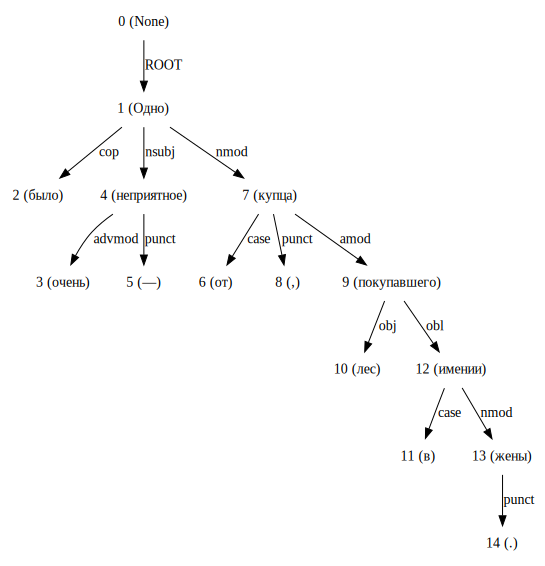

In [40]:
# нарисуем граф для UDPipe
ud_graph = DependencyGraph(tree_str=ud[1])
ud_graph